In [2]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "MONTHLY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

stock_data = pd.read_csv(datapath + filename, thousands=',')

stock_data = stock_data.iloc[::-1]
print(stock_data)

      timestamp      open      high       low     close      volume
239  2000-06-30  143.6875  149.1562  143.0000  145.2812   127146000
238  2000-07-31  145.4375  151.9843  141.5156  143.0000   106780100
237  2000-08-31  143.6250  153.0937  142.6250  152.3437   102365500
236  2000-09-29  153.2500  153.5937  142.1250  143.6250   113203000
235  2000-10-31  144.2812  145.7500  130.1562  142.9531   178392400
..          ...       ...       ...       ...       ...         ...
4    2020-01-31  323.5400  332.9500  320.3600  321.7300  1389179454
3    2020-02-28  323.3500  339.0800  285.5400  296.2600  2099672006
2    2020-03-31  298.2100  313.8400  218.2600  257.7500  5888710884
1    2020-04-30  247.9800  294.8800  243.9000  290.4800  2798273802
0    2020-05-22  285.3100  297.8700  272.9900  295.4400  1499792747

[240 rows x 6 columns]


In [4]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
from matplotlib import cm
import datetime as dt
rowNum = 1
timeRow = []
for index, row in stock_data.iterrows():
    timeRow.append(rowNum)
    rowNum += 1
stock_data['timestamp'] = timeRow

X = stock_data[['timestamp', 'low', 'high', 'open']]
y = stock_data['close']
print(stock_data)

     timestamp      open      high       low     close      volume
239          1  143.6875  149.1562  143.0000  145.2812   127146000
238          2  145.4375  151.9843  141.5156  143.0000   106780100
237          3  143.6250  153.0937  142.6250  152.3437   102365500
236          4  153.2500  153.5937  142.1250  143.6250   113203000
235          5  144.2812  145.7500  130.1562  142.9531   178392400
..         ...       ...       ...       ...       ...         ...
4          236  323.5400  332.9500  320.3600  321.7300  1389179454
3          237  323.3500  339.0800  285.5400  296.2600  2099672006
2          238  298.2100  313.8400  218.2600  257.7500  5888710884
1          239  247.9800  294.8800  243.9000  290.4800  2798273802
0          240  285.3100  297.8700  272.9900  295.4400  1499792747

[240 rows x 6 columns]


In [26]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

## Ridge Regression (regularized regression)

In [27]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Stock dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Stock dataset
ridge regression linear model intercept: 0.050166181625542094
ridge regression linear model coeff:
[ 0.00872125  0.64273312  0.83232051 -0.48166375]
R-squared score (training): 0.998
R-squared score (test): 0.998
Number of non-zero features: 4


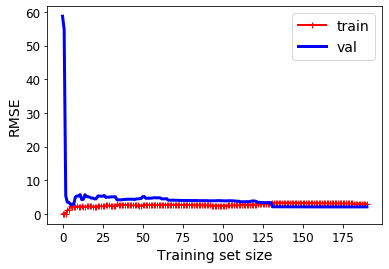

In [28]:
plot_learning_curves(linridge,  X,y)

## Ridge regression (feature normalization)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Stock dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Stock dataset
ridge regression linear model intercept: 98.2645910775835
ridge regression linear model coeff:
[38.45554244 42.36824534 44.23752511 43.33608165]
R-squared score (training): 0.877
R-squared score (test): 0.861
Number of non-zero features: 4


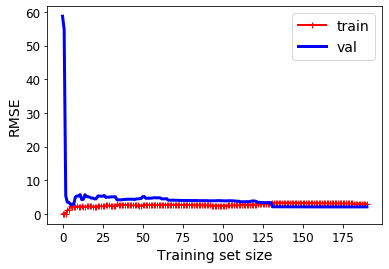

In [29]:
plot_learning_curves(linridge,X,y)

## Ridge regression with regularization parameter: alpha

In [14]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 4, r-squared training: 0.99, r-squared test: 0.99

Alpha = 10.00
num abs(coeff) > 1.0: 4, r-squared training: 0.94, r-squared test: 0.93

Alpha = 20.00
num abs(coeff) > 1.0: 4, r-squared training: 0.88, r-squared test: 0.86

Alpha = 50.00
num abs(coeff) > 1.0: 4, r-squared training: 0.69, r-squared test: 0.67

Alpha = 100.00
num abs(coeff) > 1.0: 4, r-squared training: 0.50, r-squared test: 0.48

Alpha = 1000.00
num abs(coeff) > 1.0: 4, r-squared training: 0.08, r-squared test: 0.07



## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Stock dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Stock dataset
lasso regression linear model intercept: 89.19810034204995
lasso regression linear model coeff:
[  6.93655394  37.01612056 173.33301446   0.        ]
Non-zero features: 3
R-squared score (training): 0.975
R-squared score (test): 0.973

Features with non-zero weight (sorted by absolute magnitude):
	high, 173.333
	low, 37.016
	timestamp, 6.937


/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


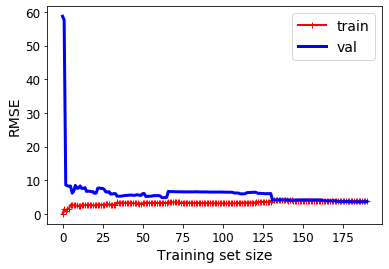

In [30]:
plot_learning_curves(linlasso,X,y)

## Lasso regression with regularization parameter: alpha

In [22]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 3, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
Features kept: 3, r-squared training: 0.99, r-squared test: 0.99

Alpha = 2.00
Features kept: 3, r-squared training: 0.98, r-squared test: 0.97

Alpha = 3.00
Features kept: 2, r-squared training: 0.95, r-squared test: 0.95

Alpha = 5.00
Features kept: 2, r-squared training: 0.88, r-squared test: 0.87

Alpha = 10.00
Features kept: 2, r-squared training: 0.54, r-squared test: 0.52

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



###### -- everything below is from another notebook

# Regularized Linear Regression

## Ridge Regression

In [100]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 0.05016618162548525
ridge regression linear model coeff:
[ 0.00872125  0.64273312  0.83232051 -0.48166375]
R-squared score (training): 0.998
R-squared score (test): 0.998
Number of non-zero features: 4


In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 98.2645910775835
ridge regression linear model coeff:
[38.45554244 42.36824534 44.23752511 43.33608165]
R-squared score (training): 0.877
R-squared score (test): 0.861
Number of non-zero features: 4


In [102]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 4, r-squared training: 0.99, r-squared test: 0.99

Alpha = 10.00
num abs(coeff) > 1.0: 4, r-squared training: 0.94, r-squared test: 0.93

Alpha = 20.00
num abs(coeff) > 1.0: 4, r-squared training: 0.88, r-squared test: 0.86

Alpha = 50.00
num abs(coeff) > 1.0: 4, r-squared training: 0.69, r-squared test: 0.67

Alpha = 100.00
num abs(coeff) > 1.0: 4, r-squared training: 0.50, r-squared test: 0.48

Alpha = 1000.00
num abs(coeff) > 1.0: 4, r-squared training: 0.08, r-squared test: 0.07



## Lasso Regression

In [103]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: 89.19810034204994
lasso regression linear model coeff:
[  6.93655394  37.01612056 173.33301446   0.        ]
Non-zero features: 3
R-squared score (training): 0.975
R-squared score (test): 0.973

Features with non-zero weight (sorted by absolute magnitude):
	high, 173.333
	low, 37.016
	timestamp, 6.937


In [104]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 3, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
Features kept: 3, r-squared training: 0.99, r-squared test: 0.99

Alpha = 2.00
Features kept: 3, r-squared training: 0.98, r-squared test: 0.97

Alpha = 3.00
Features kept: 2, r-squared training: 0.95, r-squared test: 0.95

Alpha = 5.00
Features kept: 2, r-squared training: 0.88, r-squared test: 0.87

Alpha = 10.00
Features kept: 2, r-squared training: 0.54, r-squared test: 0.52

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.00



# Polynomial Regression

In [167]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

POLYNOMIAL DEGREE-2 W/ LINEAR REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00 -7.99347520e-02  4.34919318e-01  1.26693145e+00
 -6.02763967e-01 -9.42272764e-05 -1.54505944e-04  2.97197557e-03
 -2.18838683e-03  1.61169760e-03  9.02590734e-03 -1.13616915e-02
  3.05089655e-03 -1.98144026e-02  1.70040618e-02]
(poly deg 2) linear model intercept (b): -5.150
(poly deg 2) R-squared score (training): 0.998
(poly deg 2) R-squared score (test): 0.998
(poly deg 2) RMSE score (train): 2.618
(poly deg 2) RMSE score (test): 2.882

POLYNOMIAL DEGREE-3 W/ LINEAR REGRESSION
(poly deg 3) linear model coeff (w):
[-5.16075744e+06  2.80254772e-01  2.09841510e+00 -7.94064812e-01
 -2.73281880e-01 -2.24025650e-03  6.81348823e-03 -7.94573412e-04
 -6.62889712e-03  3.31144437e-02 -1.74254272e-01  9.98042800e-02
  1.68572138e-01 -1.64736814e-01  3.76296992e-02 -7.48529833e-06
 -7.81697797e-05  8.51464694e-05  1.50377400e-05 -5.37922390e-04
  6.61120185e-04  4.07197303e-04 -1.47686763e-03  2.321543

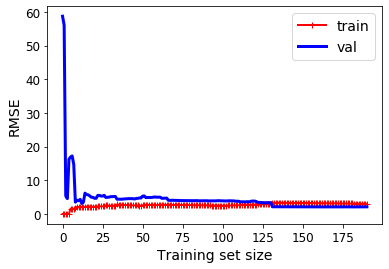

In [209]:
for degree in [2, 3, 5,10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ LINEAR REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)


POLYNOMIAL DEGREE-2 W/ RIDGE REGRESSION
(poly deg 2) linear model coeff (w):
[ 0.00000000e+00 -7.98426205e-02  4.34916393e-01  1.25916204e+00
 -5.95295586e-01 -9.24276543e-05 -1.60006468e-04  2.95921300e-03
 -2.17243998e-03  1.61157806e-03  9.03975420e-03 -1.13707216e-02
  3.04643323e-03 -1.97743849e-02  1.69646238e-02]
(poly deg 2) linear model intercept (b): -5.109
(poly deg 2) R-squared score (training): 0.998
(poly deg 2) R-squared score (test): 0.998
(poly deg 2) RMSE score (train): 2.618
(poly deg 2) RMSE score (test): 2.880

POLYNOMIAL DEGREE-3 W/ RIDGE REGRESSION
(poly deg 3) linear model coeff (w):
[ 0.00000000e+00  2.78549423e-01  1.93373813e+00 -5.95724884e-01
 -2.87435536e-01 -1.82480363e-03  6.07140566e-03 -7.96322946e-04
 -6.73928760e-03  2.97403681e-02 -1.68778384e-01  9.75296836e-02
  1.66953755e-01 -1.64688418e-01  3.96188533e-02 -3.62636305e-06
  1.27449755e-05 -2.19172077e-06  7.35113346e-06 -3.42879300e-04
 -8.89801191e-05  6.90418776e-04 -9.56618568e-04  2.08484137

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.66151e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


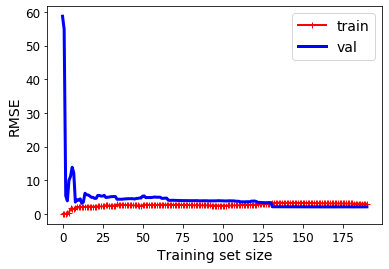

In [211]:
for degree in [2, 3, 5, 10]:
    poly = PolynomialFeatures(degree)
    X_F1_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state=0)
    linreg = Ridge().fit(X_train, y_train)

    print('POLYNOMIAL DEGREE-{} W/ RIDGE REGRESSION'.format(degree))
    print('(poly deg {}) linear model coeff (w):\n{}'
         .format(degree, linreg.coef_))
    print('(poly deg {}) linear model intercept (b): {:.3f}'
         .format(degree, linreg.intercept_))
    print('(poly deg {}) R-squared score (training): {:.3f}'
         .format(degree, linreg.score(X_train, y_train)))
    print('(poly deg {}) R-squared score (test): {:.3f}'
         .format(degree, linreg.score(X_test, y_test)))
    print('(poly deg {}) RMSE score (train): {:.3f}'
         .format(degree, sqrt(mean_squared_error(y_train, linreg.predict(X_train)))))
    print('(poly deg {}) RMSE score (test): {:.3f}\n'
         .format(degree, sqrt(mean_squared_error(y_test, linreg.predict(X_test)))))

plot_learning_curves(linreg,  X,y)